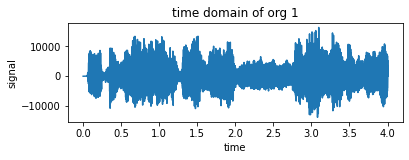

In [39]:
import numpy as np
from scipy.io import wavfile
from matplotlib import pyplot as plt

# read org_wav file
f1, v1 = wavfile.read('./org_1.wav')
f2, v2 = wavfile.read('./org_2.wav')
m, = v1.shape

# draw org 1
fig_1 = plt.figure("original signal")
plt.subplot(2,1,1)
plt.title("time domain of org 1")
plt.xlabel("time")
plt.ylabel("signal")
plt.plot(np.arange(m)/f1, v1)

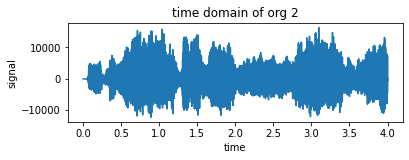

In [40]:
# draw org 2
plt.subplot(2,1,2)
plt.title("time domain of org 2")
plt.xlabel("time")
plt.ylabel("signal")
plt.plot(np.arange(m)/f2, v2)

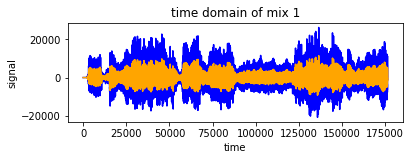

In [41]:
# mix voice
v_mix = np.c_[v1, v2]
A = np.array([[1, 0.5],[0.6, 0.2]])
X = np.dot(v_mix, A)

# draw mix voice
fig_2 = plt.figure("original signal")
plt.subplot(2,1,1)
plt.title("time domain of mix 1")
plt.xlabel("time")
plt.ylabel("signal")
plt.plot(X[:,0], color='blue')  # org 1
plt.plot(X[:,1], color='orange')  # org 2

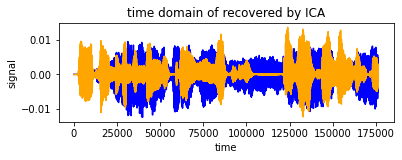

In [44]:
from sklearn.decomposition import FastICA, PCA

# ICA model
ica = FastICA()
I_ = ica.fit_transform(X) # reconstruct voice
A_ = ica.mixing_ # get estimated mixing matrix
# prove that the ICA model applies by reverting the unmixing
assert np.allclose(X, np.dot(I_, A_.T) + ica.mean_)

# draw mix voice
fig_3 = plt.figure("recovered signal")
plt.subplot(2,1,1)
plt.title("time domain of recovered by ICA")
plt.xlabel("time")
plt.ylabel("signal")
plt.plot(I_[:,0], color='blue')  # recovered 1
plt.plot(I_[:,1], color='orange')  # recovered 2

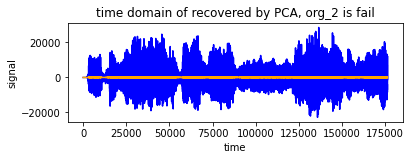

In [47]:
# PCA model
pca = PCA(n_components=2)
P_ = pca.fit_transform(X) # reconstruct voice

# draw mix voice
fig_3 = plt.figure("recovered signal")
plt.subplot(2,1,2)
plt.title("time domain of recovered by PCA, org_2 is fail")
plt.xlabel("time")
plt.ylabel("signal")
plt.plot(P_[:,0], color='blue')  # recovered 1
plt.plot(P_[:,1], color='orange')  # fail recover org_2